---
## 4. 2024~2050의 CO2 배경대기농도 예측

#### 4-0. 라이브러리 호출

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

#### 4-1. CO2 배경대기농도 데이터 호출 및 train, target 분리

In [6]:
co2 = pd.read_csv('./DB/co2_mm_mlo.csv')
train_co2 = co2[co2['decimal date'] <= 2003.9583]
target_co2 = co2[co2['decimal date'] > 2003.9583]

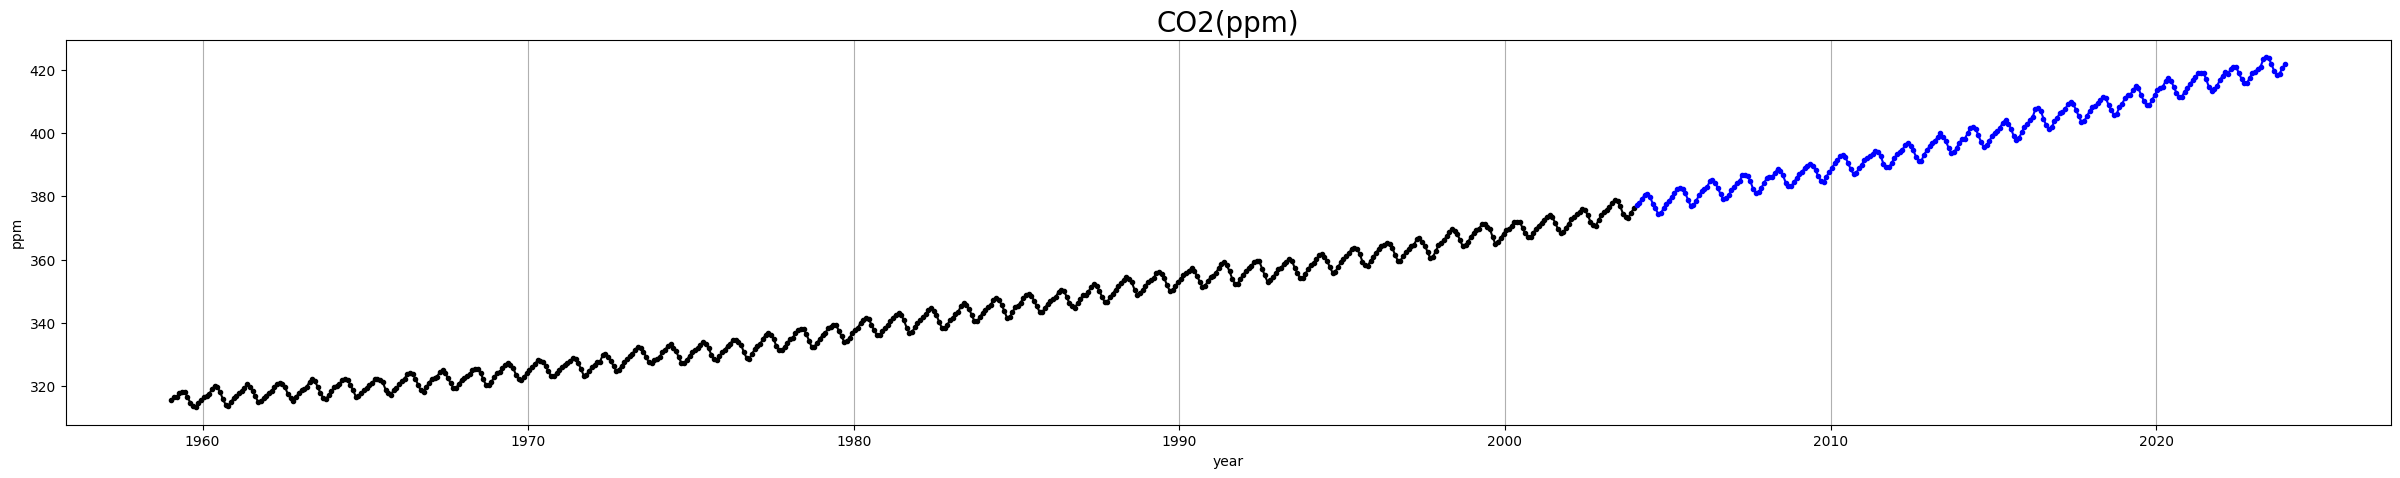

In [7]:
plt.figure(figsize=(30,5))
plt.plot(train_co2['decimal date'], train_co2['average'], marker='.', color='black')
plt.plot(target_co2['decimal date'], target_co2['average'], marker='.', color='blue')
plt.grid(axis='x'); plt.xlabel('year'); plt.ylabel('ppm')
plt.title('CO2(ppm)', fontsize=20)
plt.show()

#### 4-2. SARIMA 예측

In [8]:
Arima = ARIMA(train_co2['average'],
              order=(1,1,2),
              seasonal_order=(1,1,4,12))

forecasting = Arima.fit()
forecasting = forecasting.forecast(steps=12*20)

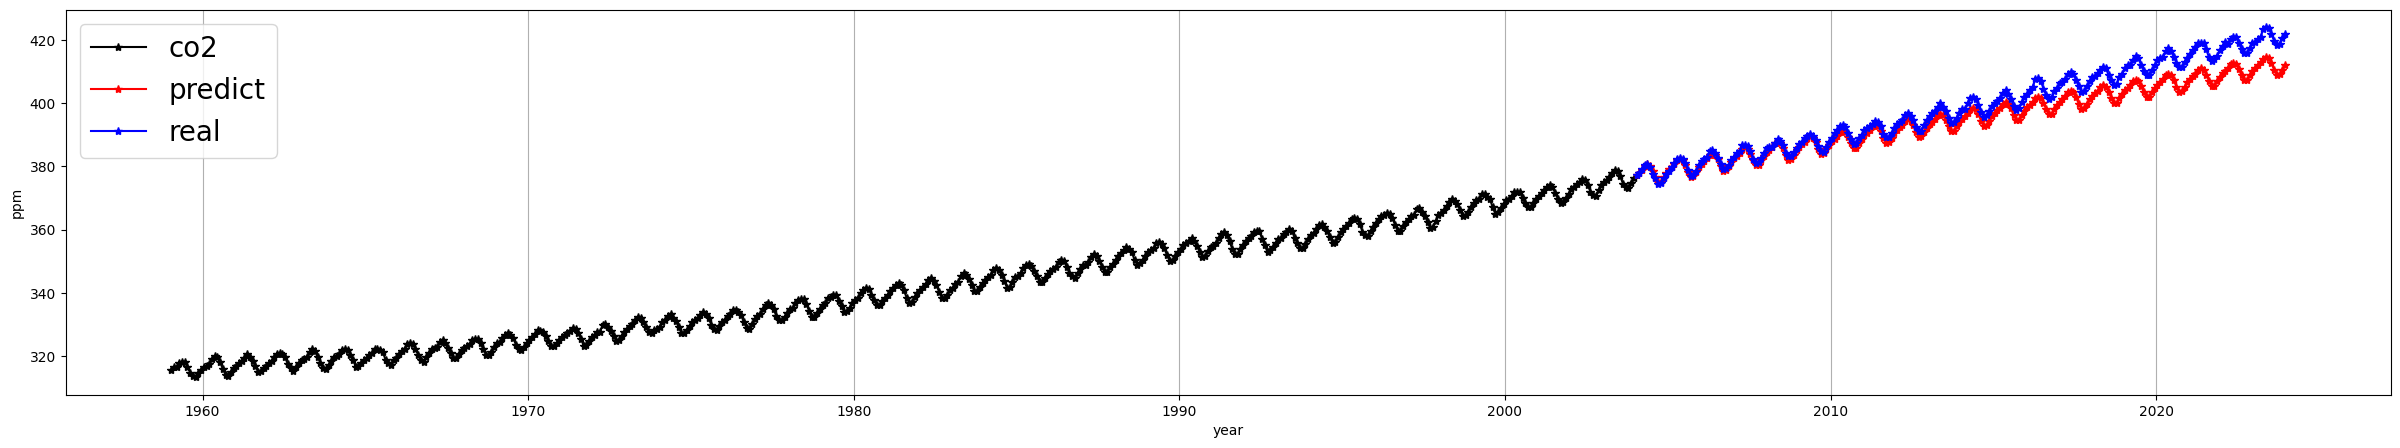

In [9]:
plt.figure(figsize=(30,5))
plt.plot(train_co2['decimal date'], train_co2['average'], color='black', marker='*')
plt.plot(target_co2['decimal date'], forecasting, marker='*', color='red')
plt.plot(target_co2['decimal date'], target_co2['average'], color='blue', marker='*')
plt.grid(axis='x'); plt.xlabel('year'); plt.ylabel('ppm')
plt.legend(('co2', 'predict', 'real'), fontsize=20)
plt.show()

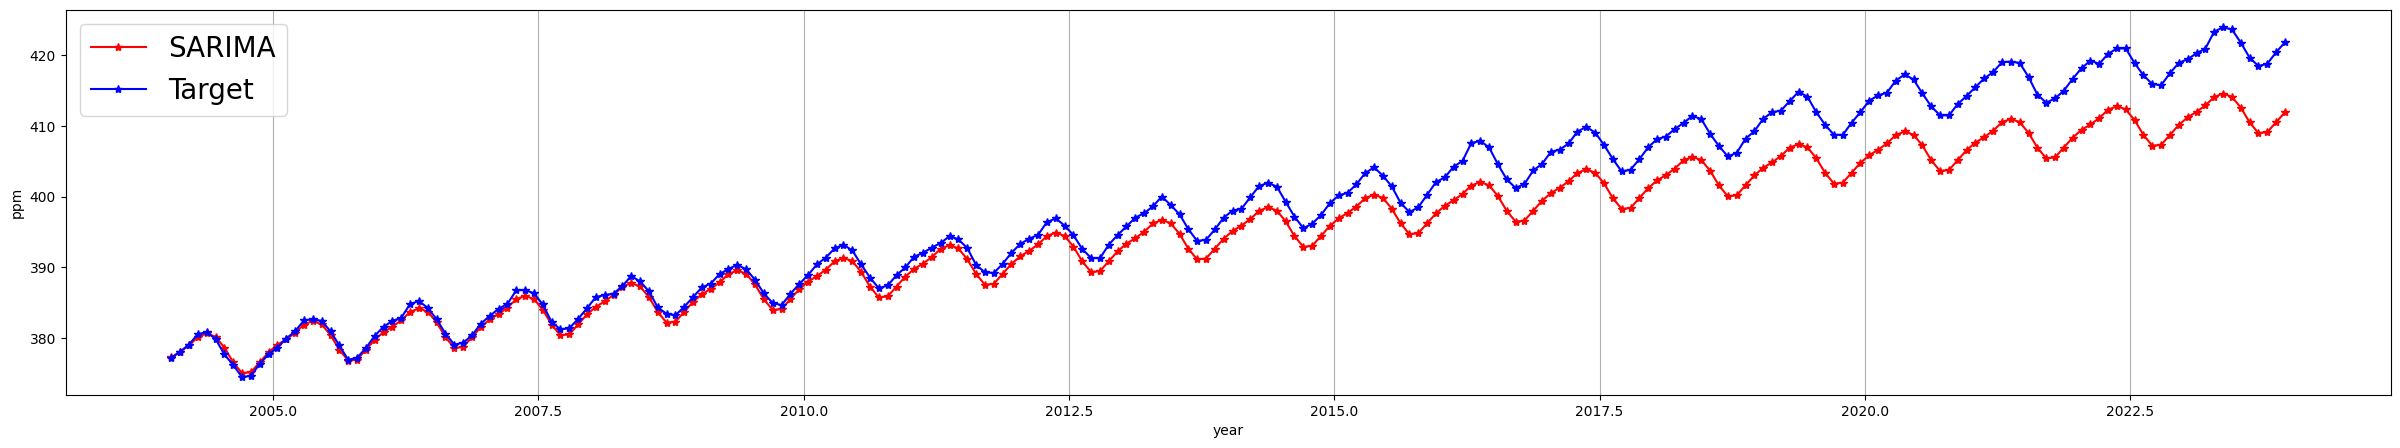

In [10]:
plt.figure(figsize=(30,5))
plt.plot(target_co2['decimal date'], forecasting, color='red', marker='*')
plt.plot(target_co2['decimal date'], target_co2['average'], color='blue', marker='*')
plt.legend(('SARIMA', 'Target'), fontsize=20)
plt.grid(axis='x'); plt.xlabel('year'); plt.ylabel('ppm')
plt.show()

In [11]:
mae_error = mean_absolute_error(target_co2['average'], forecasting)
print(f"SARIMA MAE = {mae_error}")

SARIMA MAE = 3.716625303777624


In [12]:
def generate_decimal_dates(start_year, end_year):
    # Create an empty list to store all dates
    dates = []
    
    # Generate dates for each year and month
    for year in range(start_year, end_year + 1):
        for month in range(1, 13):
            # Calculate decimal date
            decimal_date = year + (month - 0.5) / 12
            dates.append({
                'year': year,
                'month': month,
                'decimal date': round(decimal_date, 4)
            })
    
    # Convert to DataFrame
    df = pd.DataFrame(dates)
    
    return df

# Generate dates from 2024-01 to 2050-12
date_2050 = generate_decimal_dates(2024, 2050)

# Display first few rows to verify
print(date_2050.head())

   year  month  decimal date
0  2024      1     2024.0417
1  2024      2     2024.1250
2  2024      3     2024.2083
3  2024      4     2024.2917
4  2024      5     2024.3750


In [13]:
Arima_2050 = ARIMA(co2['average'],
              order=(1,1,2),
              seasonal_order=(1,1,4,12))

forecasting_2050 = Arima_2050.fit()
forecasting_2050 = forecasting_2050.forecast(steps=12*27)

/Users/gimdonghui/Documents/INU/4-2/big_data/project/venv/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


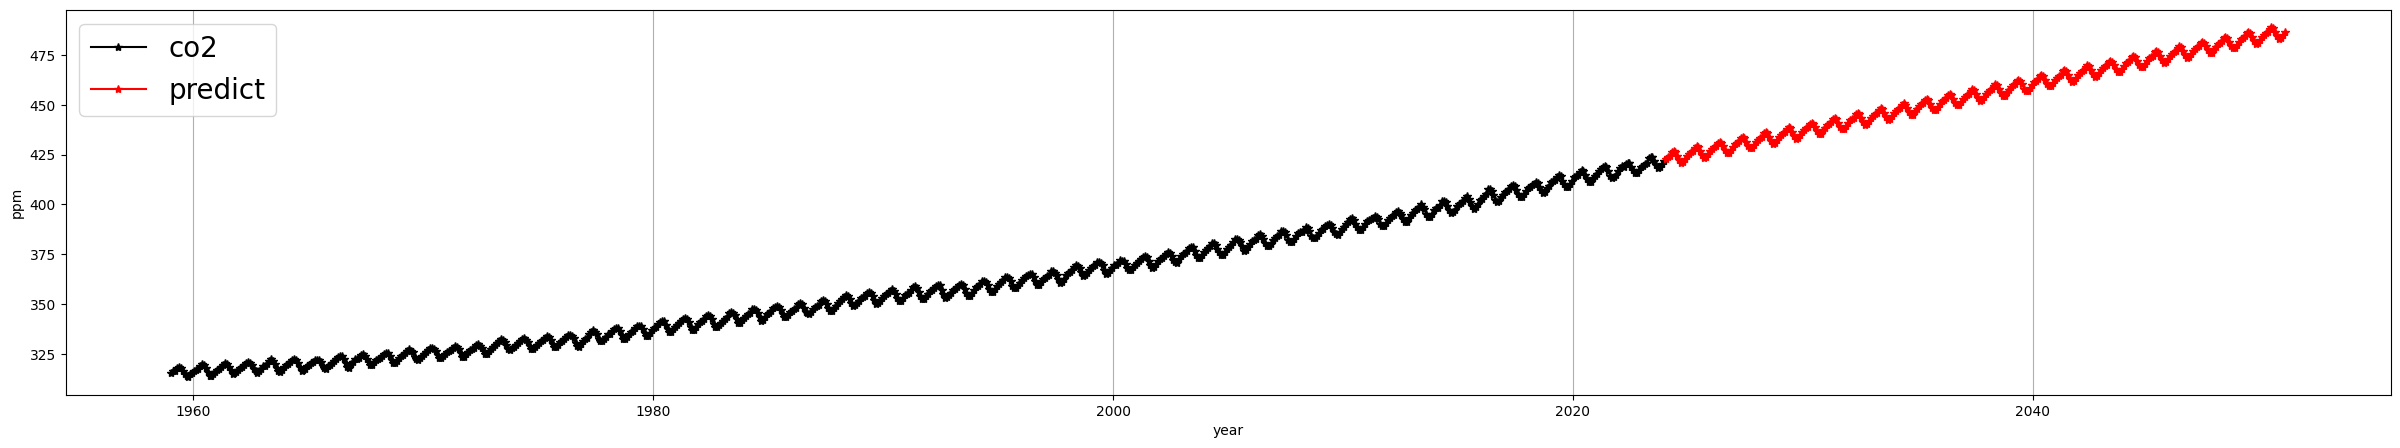

In [14]:
plt.figure(figsize=(30,5))
plt.plot(co2['decimal date'], co2['average'], color='black', marker='*')
plt.plot(date_2050['decimal date'], forecasting_2050, marker='*', color='red')
plt.grid(axis='x'); plt.xlabel('year'); plt.ylabel('ppm')
plt.legend(('co2', 'predict'), fontsize=20)
plt.show()

In [18]:
# 예측 데이터를 복사하고, 날짜 인덱스 설정 (2024년 1월부터 월간 데이터)
forecasting_2050 = forecasting_2050.copy()
forecasting_2050.index = pd.date_range(start='2024-01', periods=len(forecasting_2050), freq='ME')

# 연단위 평균 계산
annual_forecasting_2050 = forecasting_2050.resample('YE').mean()

# 연도로만 인덱스 변환
annual_forecasting_2050.index = annual_forecasting_2050.index.year

annual_forecasting_2050

2024    423.856100
2025    426.237704
2026    428.631169
2027    431.027504
2028    433.415303
2029    435.808774
2030    438.198519
2031    440.590712
2032    442.981296
2033    445.372938
2034    447.763885
2035    450.155288
2036    452.546391
2037    454.937692
2038    457.328863
2039    459.720119
2040    462.111319
2041    464.502556
2042    466.893768
2043    469.284997
2044    471.676215
2045    474.067440
2046    476.458660
2047    478.849884
2048    481.241105
2049    483.632328
2050    486.023550
Name: predicted_mean, dtype: float64

In [19]:
annual_forecasting_2050.to_csv('./DB/2024-2050_c02.csv')